## hierarchical clustering in a business context

In [13]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Importing data
df = pd.read_csv('https://raw.githubusercontent.com/kay102dev/product-hierachical-clustering/refs/heads/main/data/EngineeredRetail.csv', delimiter = ",")

In [15]:
## Exploring the size of the data set
df.shape

(3619, 3)

In [16]:
# Exploring type of data and feature names
df.sample(5)

,Amount,Frequency,Recency
2944,-0.541620,-0.649368,2.106800
0,-0.353811,-0.386057,2.118107
2141,3.246075,2.729785,-0.527807
1938,1.310369,-0.473827,0.388086
1150,-0.146195,-0.269030,-0.527807


In [17]:
# Assigning the dataframe to the variable X
X = df.copy()

Drawing a dendrogram using `method = "ward"` and matplotlib.

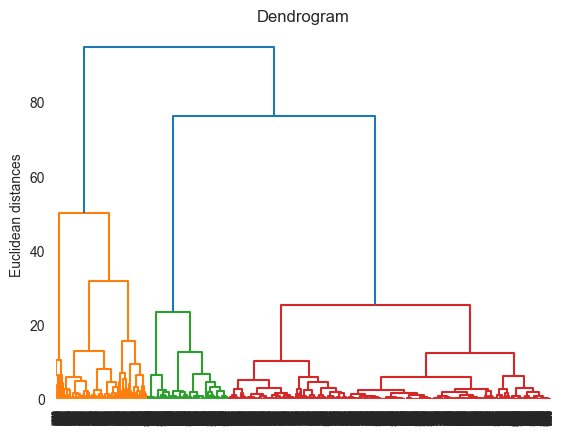

In [18]:
# Finding optimal number of clusters using a dendrogram
dendro = dendrogram(linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [19]:
# Fitting with three clusters
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)

In [20]:
# Setting up dataframe with cluster labels
Xnew = X.copy()
Xnew["CLUSTERS"] = y_hc
Xnew.sample(10, random_state=0)

,Amount,Frequency,Recency,CLUSTERS
227,-0.519331,-0.612797,-0.358198,0
2291,-0.283653,-0.429942,-0.459964,0
3305,-0.539275,-0.722510,2.219873,0
2161,-0.325221,-0.027662,-0.527807,0
2545,-0.493537,-0.334858,-0.448656,0
3391,-0.546599,-0.693253,0.150632,0
2453,-0.556838,-0.737138,2.434712,0
2678,-0.556902,-0.737138,1.507511,0
1980,0.687795,0.711071,-0.516500,1
2012,0.172700,0.403875,-0.527807,0


In [21]:
# Counting the number of observations in each cluster
Xnew['CLUSTERS'].value_counts()

CLUSTERS
0    2948
1     671
Name: count, dtype: int64

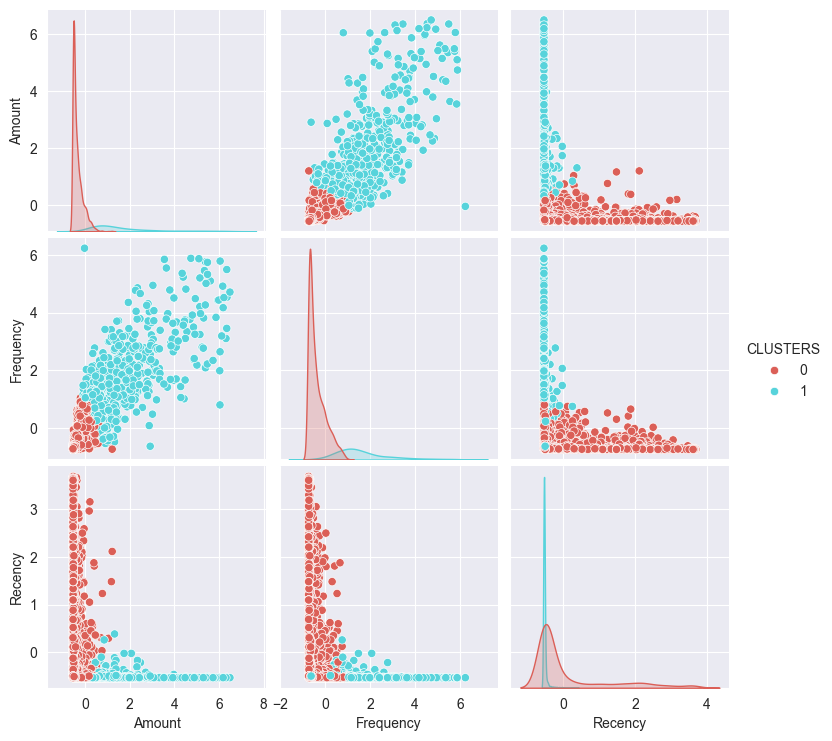

In [22]:
# Plotting the three engineered variables using a pair-wise plot
var = ["Amount", "Frequency", "Recency"]
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 2))